<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


Problema.

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

5. Realice un ajuste a la curva construida en el apartado anterior.

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.



In [101]:
from scipy.integrate import odeint
import numpy as np
import sympy as sy
import matplotlib.pylab as plt
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

\begin{equation}
\frac{dv_x}{dt} = -b(v_x-u\cos \alpha )\\
\frac{dv_y}{dt} =-g-b(v_y-u\sin \alpha )
\end{equation}

In [102]:
def proyectil(cond,t,parametros):
    b,theta,u,alpha,v0,g = parametros
    x,y,vx,vy =cond
    dxdt = vx
    dydt = vy
    dvxdt= -b*(vx-u*np.cos(alpha))
    dvydt= -g-b*(vy-u*np.sin(alpha))
    return np.array([dxdt,dydt,dvxdt,dvydt])

In [103]:
#Comprobar la solución
b=0.05
theta=np.deg2rad(60)    #rad
v0=50                   #m/s
u=v0/2                  #m/s
alpha=np.pi             #rad
g=9.8                   #m/s^2
condI=[0,0,v0*np.cos(theta),v0*np.sin(theta)]
tf = 9
t=np.linspace(0,tf,1000)
parametros = np.array([b,theta,u,alpha,v0,g])

In [104]:
solucion_edo=odeint(proyectil,condI,t,args=(parametros,))
x_num,y_num,vx_num,vy_num=solucion_edo.T

\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [105]:
#Solución teórica
def x(t,b,theta,u,alpha,v0,g):
    return (u*np.cos(alpha))*t+(1/b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t))

def y(t,b,theta,u,alpha,v0,g):
    return (1/b)*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t))-((g/b)-u*np.sin(alpha))*t


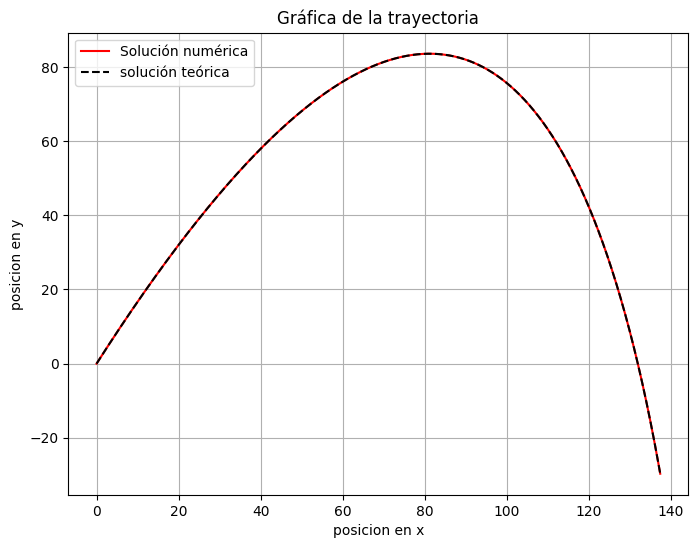

In [106]:
#Gráfico
plt.figure(figsize=(8,6))
plt.plot(x_num,y_num,"r", label="Solución numérica")
plt.plot(x(t,b,theta,u,alpha,v0,g),y(t,b,theta,u,alpha,v0,g),"k",label="solución teórica", linestyle="--")
plt.title("Gráfica de la trayectoria")
plt.xlabel("posicion en x")
plt.ylabel("posicion en y")
plt.legend()
plt.grid(True)
plt.show()

In [107]:
#Cáculo del alcance máximo para theta=45
rango_theta=np.linspace(10,80,100)
rangos_maximos=np.zeros(len(rango_theta))

for i, grado_theta in enumerate(rango_theta):
    theta_rad=np.radians(grado_theta)
    condiciones_iniciales=[0,v0*np.cos(theta),0,v0*np.sin(theta)]
    solucion=odeint(proyectil,condiciones_iniciales,t,args=(parametros,))
    x_max=(u*np.cos(alpha)*t+(1/b)*(v0*np.cos(theta_rad)-u*np.cos(alpha))*(1-np.exp(-b*t)))
    rangos_maximos[i]=np.max(x_max)

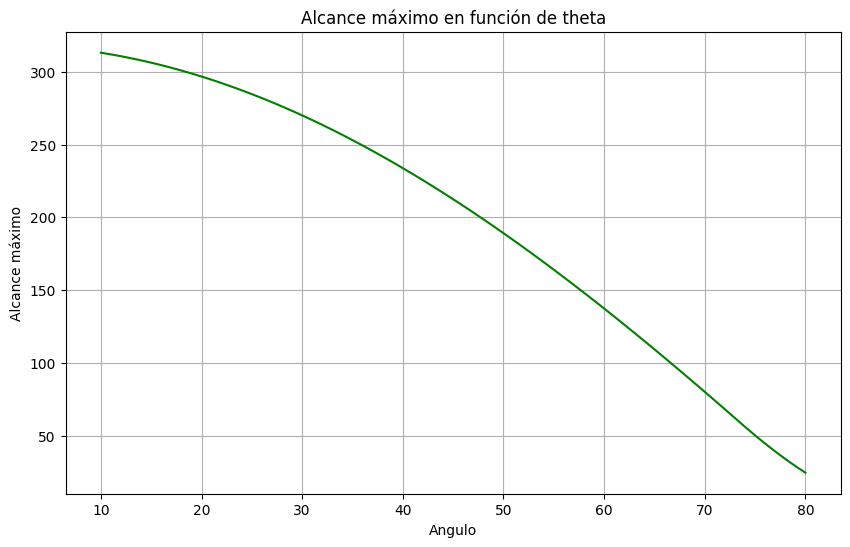

In [108]:
plt.figure(figsize=(10,6))
plt.plot(rango_theta,rangos_maximos,"g",label="Alcance máximo")
plt.title("Alcance máximo en función de theta")
plt.xlabel("Angulo")
plt.ylabel("Alcance máximo")
plt.grid(True)
plt.show()

In [109]:
#Ajuste de curva
f_params=np.polyfit(rango_theta,rangos_maximos,2)
f_curva=np.poly1d(f_params)

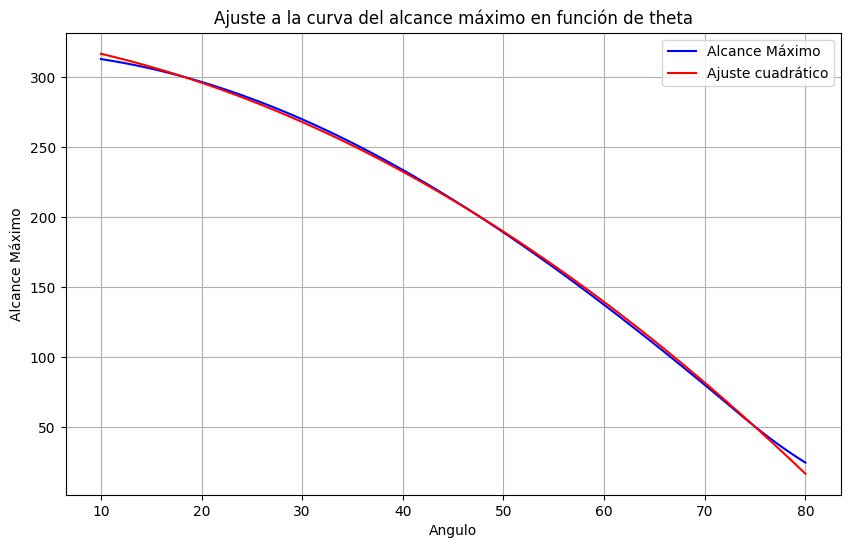

In [110]:
#Grafica de ajuste
plt.figure(figsize=(10,6))
plt.plot(rango_theta,rangos_maximos,"b",label="Alcance Máximo")
plt.plot(rango_theta,f_curva(rango_theta),"r",label="Ajuste cuadrático")
plt.title("Ajuste a la curva del alcance máximo en función de theta")
plt.xlabel("Angulo")
plt.ylabel("Alcance Máximo")
plt.legend()
plt.grid(True)
plt.show()

In [111]:
#Angulo crítico
angulo_critico=np.degrees(abs(np.arccos(u/v0)))
print(f"Ángulo Crítico teórico:{angulo_critico}")

#Resolver el sistema no lineal para encontrar el ángulo crítico numérico
def sis_enol(variacion):
    t,theta_rad=variacion
    x_critico=(u*np.cos(alpha))*t+(1/b)*(v0*np.cos(theta_rad)-u*np.cos(alpha))*(1-np.exp(-b*t))
    y_critico=(1/b)*((g/b)+v0*np.sin(theta_rad)-u*np.sin(alpha))*(1-np.exp(-b*t))-((g/b)-u*np.sin(alpha))*t
    return[x_critico,y_critico]

#Aproximación inicial
inicial=[1,np.radians(45)]
#resuelve el sistema no lineal
solucion_critica=fsolve(sis_enol,inicial)
angulo_crit_num=np.degrees(solucion_critica[1])
print(f"Angulo crítico numérico:{angulo_crit_num}")


Ángulo Crítico teórico:60.00000000000001
Angulo crítico numérico:41.172363816572364


In [112]:
#Trayectorias para ángulos específicos
angulos_Tra=np.arange(10,46,5)
alturas_maximas=np.zeros(len(angulos_Tra))
for i,grado_theta in enumerate(angulos_Tra):
    angulo_rad=np.radians(grado_theta)
    cond_ini=[0,0,v0*np.cos(angulo_rad),v0*np.sin(angulo_rad)]
    solucion_an=odeint(proyectil,cond_ini,t,args=(parametros,))
    alturas_maximas[i]=np.max(solucion_an[:,1])

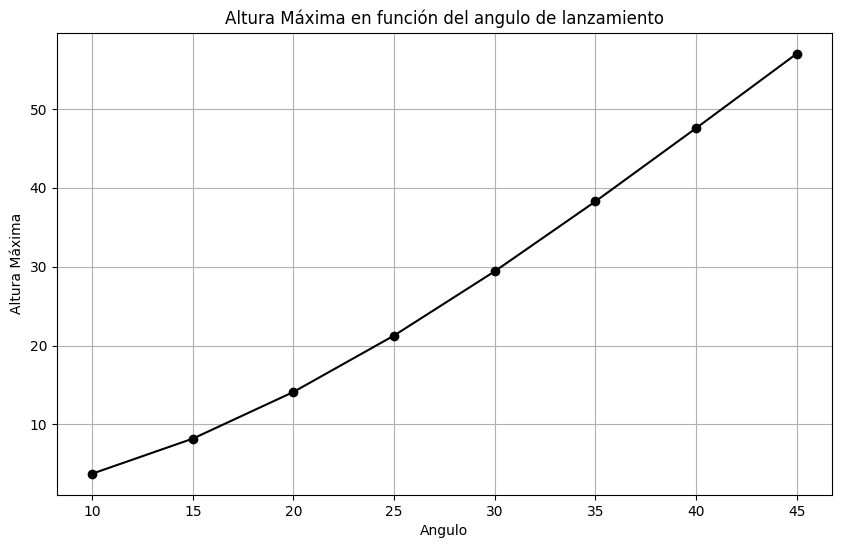

In [113]:
#Gráfica de los máximos en función del ángulo
plt.figure(figsize=(10,6))
plt.plot(angulos_Tra,alturas_maximas,marker="o",linestyle="-",color="k")
plt.title("Altura Máxima en función del angulo de lanzamiento")
plt.xlabel("Angulo")
plt.ylabel("Altura Máxima")
plt.grid(True)
plt.show()